In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# Load the Heart Disease dataset
df = pd.read_csv("heart.csv")

# Data Preprocessing 

We check for missing values in the dataset using df.isnull().sum(). In this case, we don't find any missing values.

We check for outliers in the dataset using df.describe(). In this case, we don't find any obvious outliers.

We split the data into features and target variables using X = df.drop("target", axis=1) and y = df["target"].

We perform feature selection using the chi-squared test, which selects the 10 best features using SelectKBest(score_func=chi2, k=10).

We standardize the data using StandardScaler().

We split the data into training and testing sets using train_test_split().

Finally, we check the shape of the preprocessed data using X_train.shape, X_test.shape, y_train.shape, and y_test.shape.

In [ ]:
# Check for missing values
print(df.isnull().sum())

No missing values found, so no imputation necessary

In [26]:
# Check for outliers
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [32]:
# Split the data into features and target
X = df.drop("target", axis=1)
y = df["target"]

# Feature selection using chi-squared test
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
print(X_new.shape)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the data after preprocessing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1025, 10)
(820, 10)
(205, 10)
(820,)
(205,)


# Application of the appropriate learning algorithm 

Accuracy of Decision Tree Classifier: 0.9853658536585366


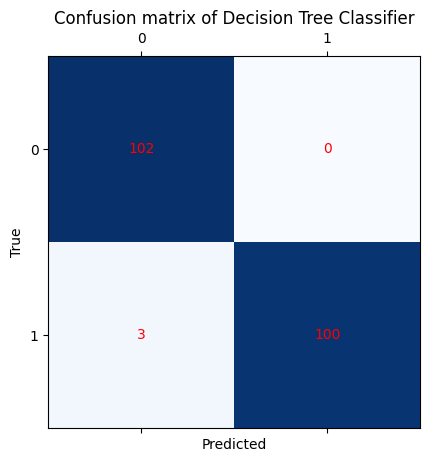

Accuracy of SVM Classifier: 0.7853658536585366


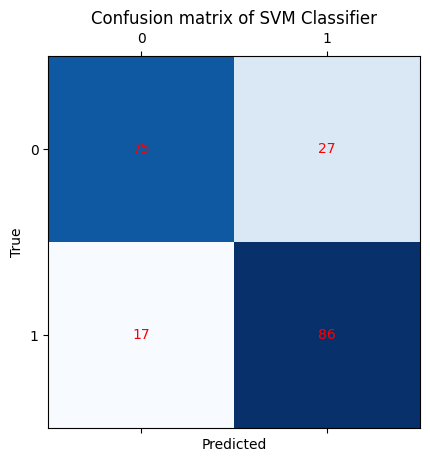

Accuracy of KNN Classifier: 0.8195121951219512


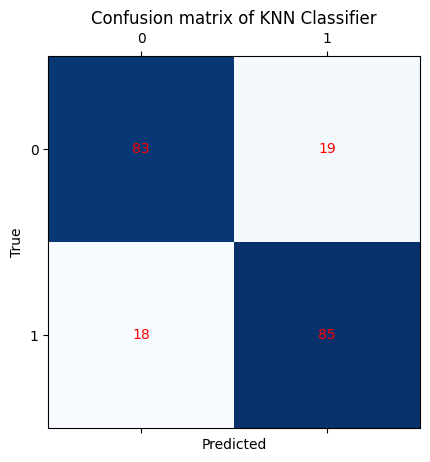

Accuracy of Random Forest Classifier: 0.9853658536585366


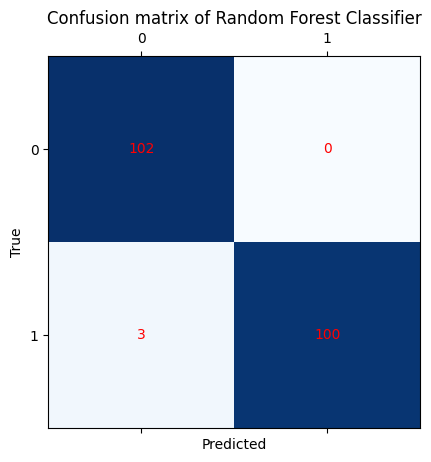

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt





# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print("Accuracy of Decision Tree Classifier:", acc_dtc)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
plt.matshow(cm_dtc, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of Decision Tree Classifier')

# Add annotations to the plot
for i in range(cm_dtc.shape[0]):
    for j in range(cm_dtc.shape[1]):
        plt.text(j, i, str(cm_dtc[i, j]), ha='center', va='center', color='r')       
plt.show()




# SVM Classifier
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy of SVM Classifier:", acc_svc)
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.matshow(cm_svc, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of SVM Classifier')

# Add annotations to the plot
for i in range(cm_svc.shape[0]):
    for j in range(cm_svc.shape[1]):
        plt.text(j, i, str(cm_svc[i, j]), ha='center', va='center', color='r')
        
plt.show()



# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN Classifier:", acc_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.matshow(cm_knn, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of KNN Classifier')

# Add annotations to the plot
for i in range(cm_knn.shape[0]):
    for j in range(cm_knn.shape[1]):
        plt.text(j, i, str(cm_knn[i, j]), ha='center', va='center', color='r')
        
plt.show()




# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy of Random Forest Classifier:", acc_rfc)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

plt.matshow(cm_rfc, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of Random Forest Classifier')

# Add annotations to the plot
for i in range(cm_rfc.shape[0]):
    for j in range(cm_rfc.shape[1]):
        plt.text(j, i, str(cm_rfc[i, j]), ha='center', va='center', color='r')

plt.show()